In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
from scipy import linalg
from scipy.interpolate import interp1d

In [2]:
model_name = 'redmagic_chi6_1e-02_HBT' #'redmagic_chi2_6e-03_HBT'
binning = 'abun2'
redshift = 0.3

rich_name1 = 'q180_bg_miscen'
rich_name2 = 'q180_bg'
rich_name3 = 'd30_bg_miscen'
rich_name4 = 'q180_R1_bg_miscen'
rich_name5 = 'd1_bg_miscen'
rich_name_list = [rich_name1]#, rich_name2, rich_name3, rich_name4, rich_name5]

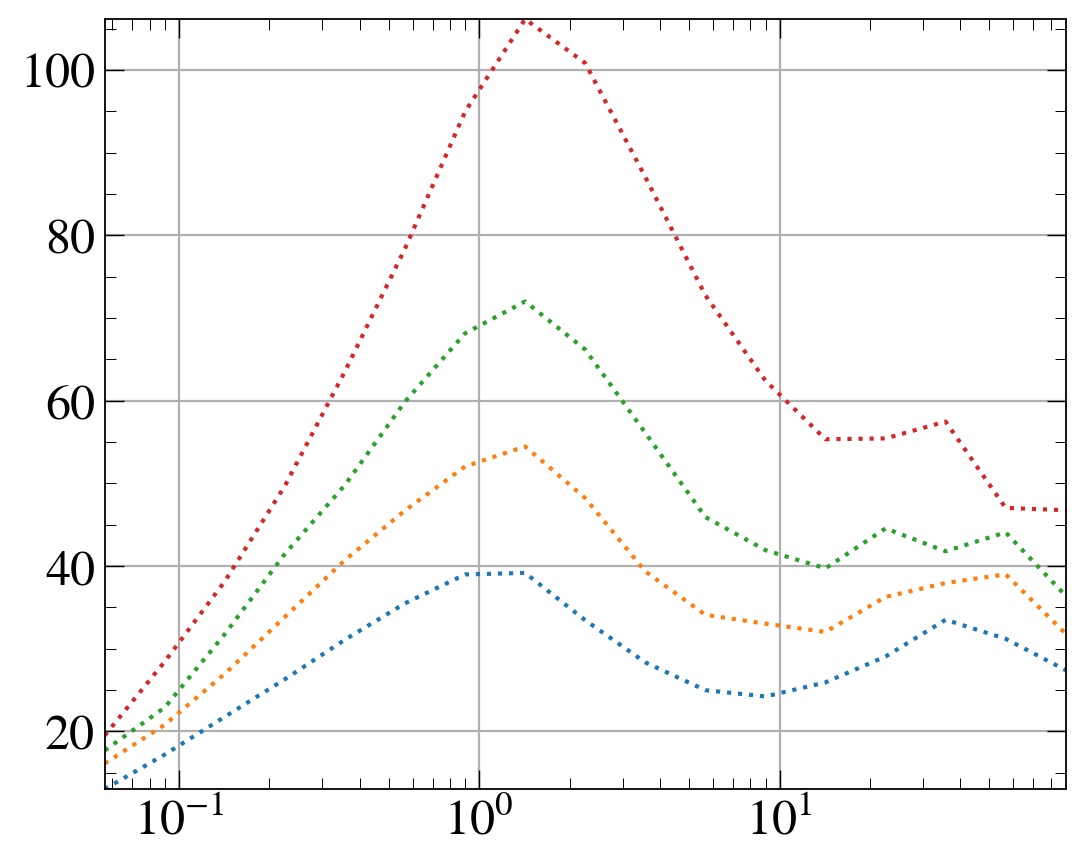

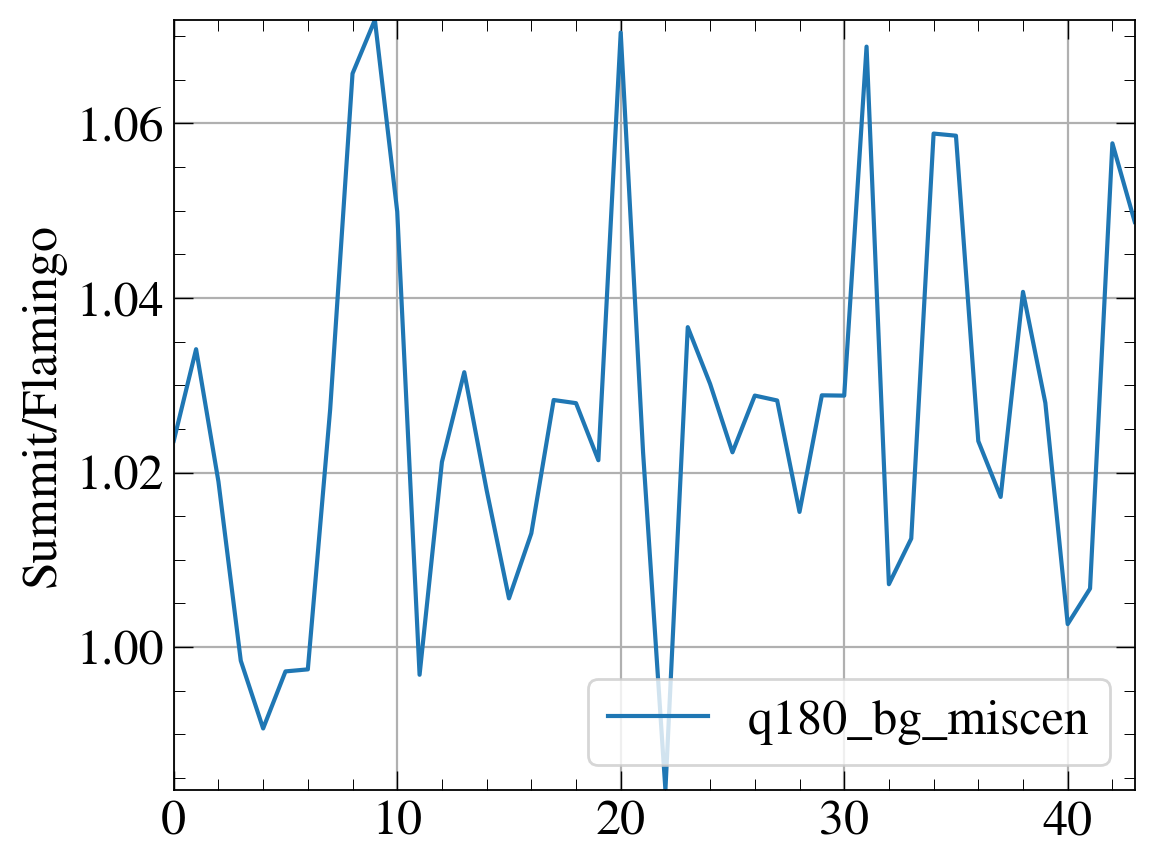

In [4]:
## make the data vector for MCMC
for rich_name in rich_name_list:
    
    #output_loc = '/cosma8/data/do012/dc-wu5/cylinder/output_L1000N3600/HYDRO_FIDUCIAL/'
    output_loc = '/projects/hywu/cluster_sims/cluster_finding/data/flamingo/output_L1000N3600/HYDRO_FIDUCIAL/'
    output_loc += f'z{redshift}/model_{model_name}/' 
    data_loc = output_loc + f'obs_{rich_name}_desy1/'
    #print(data_loc)
    
    rp_list = np.logspace(np.log10(0.03), np.log10(30), 15+1)
    rpmin_list = rp_list[:-1]
    rpmax_list = rp_list[1:]
    rpmid_list = np.sqrt(rpmin_list*rpmax_list)
    rp_rad = rpmid_list[rpmid_list>0.2]
    #print('len(rp_rad) = ', len(rp_rad))
    
    DS_data = []
    for ibin in range(4):
        rp_in, DS_in = np.loadtxt(data_loc + f'DS_phys_noh_{binning}_bin_{ibin}.dat', unpack=True)
        if binning == 'lam':
            ls = '-'
        if binning == 'abun2':
            ls = ':'        
        plt.figure(1)
        plt.semilogx(rp_in, rp_in*DS_in, ls=ls)
        
        DS_interp = interp1d(np.log(rp_in), np.log(DS_in))
        DS_data.extend(np.exp(DS_interp(np.log(rp_rad))))
        np.savetxt(f'data_vector_flamingo/lensing_{rich_name}_{binning}_z{redshift}.dat', DS_data)
    
    if binning == 'lam':
        DS_data = np.array(DS_data)
        x, x, NC_data = np.loadtxt(data_loc+'abundance.dat', unpack=True)
        np.savetxt(f'data_vector_flamingo/counts_{rich_name}_{binning}_z{redshift}.dat', NC_data)

    plt.figure(2)
    DS_summit = np.loadtxt('data_vector_abacus_summit/lensing_q180_bg_miscen_abun_z0.3.dat')
    plt.plot(DS_summit/DS_data, label=rich_name)
    plt.ylabel('Summit/Flamingo')
    plt.legend()

In [ ]:
# DS_summit = np.loadtxt('data_vector_abacus_summit/lensing_q180_bg_miscen_abun_z0.3.dat')
# plt.plot(DS_summit, label='Summit')
# plt.plot(DS_data, label='Flamingo')
# plt.yscale('log')

In [ ]:
# DS_summit = np.loadtxt('data_vector_abacus_summit/lensing_q180_bg_miscen_abun_z0.3.dat')
# plt.plot(DS_summit/DS_data, label='Summit/Flamingo')